In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suhai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df=pd.read_csv("C:\\Users\\suhai\\InstaFake\\Digital Analytics\\Offsite Analytics\\offsite.csv")

In [3]:
df['comment_agents']=df.comment_agent.apply(lambda x:str(x).split(")")[0].split('(')[-1].split(';')[0])

In [4]:
df=df.replace('X11','Linux')

In [6]:
df.drop('comment_agent',axis=1,inplace=True)

In [5]:
df

,comment_date,comment_post_ID,post_title,comment_content,comment_author,comment_agent,comment_agents
0,2020-06-23 08:09:02,158,Father day gifts,such a beautiful creativity person u r 😊,Major,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,Windows NT 6.3
1,2020-06-29 22:17:21,158,anniversary gifts,Its a waste of time!!,Maria,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Linux
2,2020-06-30 18:17:59,158,Mothers day Surprises,I loved it thank you for this blog,Parbrize JAGUAR XF X250 2013,Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US...,Windows
3,2020-07-09 09:56:30,157,Surprise your hubbies,did not expect these ideas,Barney stinson,The Incutio XML-RPC PHP Library -- WordPress/5...,The Incutio XML-RPC PHP Library -- WordPress/5...
4,2020-07-09 09:56:59,1,Friendship day surpise gifts,I am mad because this want upto expectations,Barney stinson,The Incutio XML-RPC PHP Library -- WordPress/5...,The Incutio XML-RPC PHP Library -- WordPress/5...
...,...,...,...,...,...,...,...
58,2021-12-03 17:47:38,666,Congrats surprise ideas,No offence but these were basic,Harry wells,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows NT 6.1
59,2021-12-03 17:47:51,707,gift ideas for your brother,Its such Cute ideas,Harry wells,Mozilla/5.0 (compatible; Konqueror/3.1-rc4; i6...,compatible
60,2021-12-03 17:48:10,834,gift ideas for your sister,what a waste of time.,Harry wells,Mozilla/5.0 (compatible; Konqueror/3.1-rc4; i6...,compatible
61,2021-12-06 19:18:51,666,Valentines day surpise gifts,Superb! Definitely a great idea.,Shawna,Mozilla/5.0 (X11; Linux i686; rv:52.9) Gecko/2...,Linux


#### Most Popular Operating System Used?

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


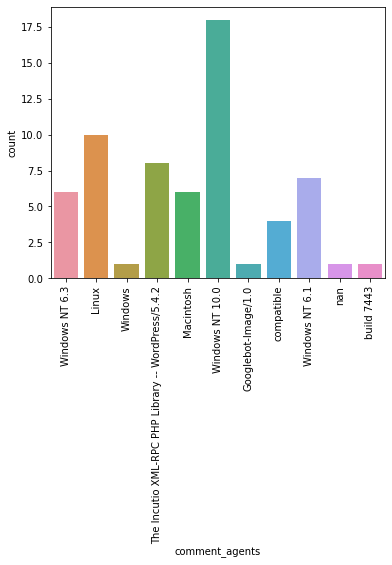

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(df.comment_agents)
plt.xticks(rotation=90)
plt.savefig('Os.jpg')

##### Windows followed by linux then macintosh

In [12]:
df.comment_date=pd.to_datetime(df.comment_date)

In [13]:
df['year']=df.comment_date.dt.year
df['month']=df.comment_date.dt.month
df['day']=df.comment_date.dt.day
df['hour']=df.comment_date.dt.hour
df['minutes']=df.comment_date.dt.minute

#### What time of day has most engagement?

In [14]:
df['time_of_the_day']=''
df.loc[(df.hour>=18)& (df.hour<24),'time_of_the_day']='Night'
df.loc[(df.hour>=12)& (df.hour<18),'time_of_the_day']='Afternoon'
df.loc[df['time_of_the_day']=='','time_of_the_day']='Morning'

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


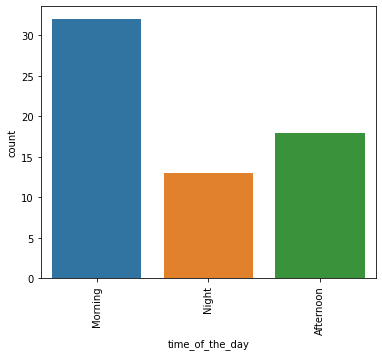

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(df['time_of_the_day'])
plt.xticks(rotation=90)
plt.savefig('timeofday.jpg')

Morning time is the best for publishing articles

#### What month has highest engagement?

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


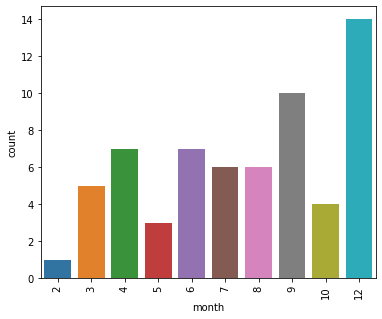

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(df['month'])
plt.xticks(rotation=90)
plt.savefig('monthly.jpg')

December had the highest engagement

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["comment_content"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['negative', 'neutral', 'positive'])

C:\Users\suhai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


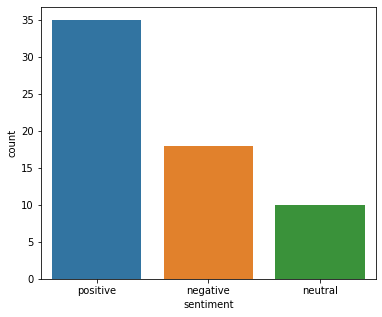

In [19]:
plt.figure(figsize=(6,5))

sns.countplot(df.sentiment)
plt.savefig('sentimental.jpg')

In [114]:
df[df['sentiment']=='positive']['post_title']

0                     Father day gifts
2                Mothers day Surprises
5                babyshower gift ideas
7     Raksha bandhan day surpise gifts
8                   Easter Sunday gift
10                  Surprise your pets
13                    babyshower gifts
14                  Surprise your pets
16              anniversary gift ideas
17               Fathers day Surprises
20        Friendship day surpise gifts
22                babyshower surprises
23        Valentines day surpise gifts
24          gift ideas for your mother
26               Mothers day Surprises
27                   Mothers day gifts
28          Republic day surpise gifts
30                  birthday surprises
34          gift ideas for your father
35          gift ideas for your sister
37    Raksha bandhan day surpise gifts
38                    Father day gifts
42         gift ideas for your brother
44               Surprise your hubbies
46                      Birthday gifts
48          gift ideas fo

In [115]:
df[df['sentiment']=='negative']['post_title']

1                    anniversary gifts
4         Friendship day surpise gifts
9                      Earth day gifts
11          gift ideas for your father
12          Surprise your well wishers
21               Mothers day Surprises
29                Surprise your friend
31                 birthday gift ideas
36          gift ideas for your sister
39               Surprise your hubbies
40                     Earth day gifts
45         gift ideas for your brother
47    Raksha bandhan day surpise gifts
49                Good friday surprise
51               Fathers day Surprises
55          gift ideas for your mother
58             Congrats surprise ideas
60          gift ideas for your sister
Name: post_title, dtype: object

In [116]:
df[df['sentiment']=='neutral']['post_title']

3          Surprise your hubbies
6     Surprise your well wishers
15          Surprise your friend
18             Mothers day gifts
19               Earth day gifts
25              Father day gifts
32          Surprise your friend
33            Surprise your pets
41         Fathers day Surprises
43    gift ideas for your father
Name: post_title, dtype: object

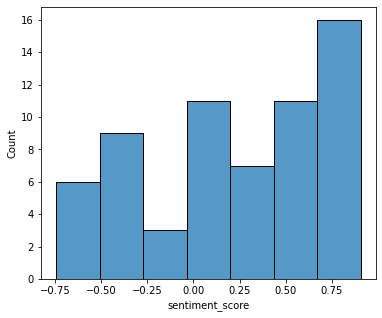

In [25]:
plt.figure(figsize=(6,5))
sns.histplot(df['sentiment_score'])
plt.savefig('sentimentScore.jpg')